In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
!ls data

calendar.csv               sample_submission.csv
sales_train_validation.csv sell_prices.csv


# sales_train_validation.csv

In [4]:
df = pd.read_csv("data/sales_train_validation.csv")
print(df.shape)
df.head(20)

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,0,1,37,3,4,6,3,2,1
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,0,1,1,6,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,1,0,0,0,0,0,0,2,0,2


In [5]:
df["item_id"].nunique()

3049

In [6]:
df["cat_id"].value_counts()

FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64

In [7]:
df["dept_id"].value_counts()

FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64

In [8]:
df["store_id"].value_counts() # 3049 items

WI_1    3049
TX_2    3049
TX_3    3049
CA_1    3049
WI_3    3049
CA_2    3049
CA_3    3049
WI_2    3049
TX_1    3049
CA_4    3049
Name: store_id, dtype: int64

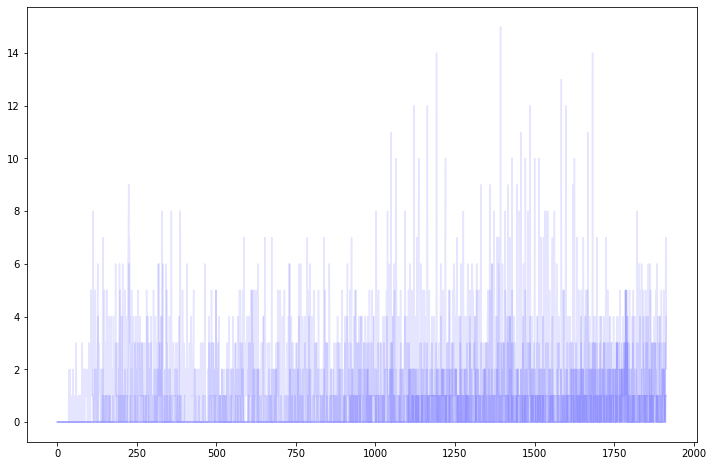

In [9]:
ca_1 = df[df["store_id"] == "CA_1"]

for i, row in ca_1.head(5).iterrows():
    plt.plot(range(1, 1914), row[6:], c="blue", alpha=0.1)

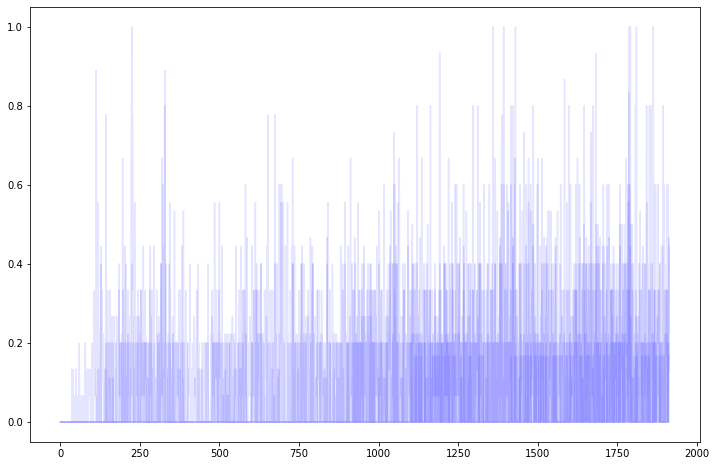

In [10]:
for i, row in ca_1.head(5).iterrows():
    plt.plot(range(1, 1914), row[6:] / max(row[6:]), c="blue", alpha=0.1)

# calendar.csv

In [11]:
df_cal = pd.read_csv("data/calendar.csv")
print(df_cal.shape)
df_cal.head(20)

(1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [12]:
df_cal["event_type_1"].value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [13]:
df_cal["event_type_2"].value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

# sell_prices.csv

In [14]:
df_price = pd.read_csv("data/sell_prices.csv")
print(df_price.shape)
df_price.head(20)

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
5,CA_1,HOBBIES_1_001,11330,8.26
6,CA_1,HOBBIES_1_001,11331,8.26
7,CA_1,HOBBIES_1_001,11332,8.26
8,CA_1,HOBBIES_1_001,11333,8.26
9,CA_1,HOBBIES_1_001,11334,8.26


In [15]:
df_price["item_id"].nunique()

3049

In [16]:
df_price_grouped = df_price[["item_id", "sell_price"]]\
    .groupby("item_id")\
    .aggregate({
    "sell_price": ["mean", "std", "min", "median", "max"]
})
df_price_grouped.sample(20)

sell_price                              
                      mean       std   min median    max
item_id                                                 
HOBBIES_1_292     6.580000  0.000000  6.58   6.58   6.58
HOBBIES_1_200     7.852116  0.104834  7.47   7.88   7.94
HOUSEHOLD_1_103   4.880639  0.136828  4.64   4.94   4.97
HOUSEHOLD_2_457   6.462660  0.142369  5.97   6.47   7.27
HOUSEHOLD_2_397   6.981801  0.005727  6.98   6.98   7.00
HOBBIES_2_096     2.718462  0.113372  1.97   2.77   2.77
FOODS_2_101       5.966871  0.071521  5.86   5.98   6.33
HOBBIES_1_180    19.949263  0.612706  7.68  19.98  19.98
FOODS_1_052       0.980000  0.000000  0.98   0.98   0.98
HOBBIES_2_079     2.363856  0.210693  1.00   2.47   2.47
FOODS_2_342       5.937281  0.111236  5.74   5.98   6.33
HOUSEHOLD_1_012   3.912211  0.106707  0.93   3.92   3.92
HOUSEHOLD_2_477   5.903078  0.097711  4.24   5.92   5.97
HOUSEHOLD_1_169   2.959551  0.030962  2.94   2.94   3.28
FOODS_3_695       3.990723  0.089177  3.74   3.98   4.53
HOBBIES_2_056     3.317185  0.499660  1.00   3.50   3.50
FOODS_2_389      12.568773  1.255429  8.99  12.97  13.98
FOODS_1_107       6.166099  1.126613  4.50   5.92   8.38
HOUSEHOLD_2_492   5.920095  0.226450  1.29   5.92   6.27
HOUSEHOLD_1_078   2.838591  0.040450  1.69   2.84   2.97

# sample_submission.csv

In [17]:
df_sub = pd.read_csv("data/sample_submission.csv")
print(df_sub.shape)
df_sub.head(20)

(60980, 29)


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,HOBBIES_1_006_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,HOBBIES_1_007_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,HOBBIES_1_008_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,HOBBIES_1_009_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
